<a href="https://colab.research.google.com/github/sukmoonlee/JupyterNotebook/blob/main/2020/realty_2020_seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python Pandas 활용한 부동산 실거래가 분석
 - http://rtdown.molit.go.kr/ 사이트에서 조건과 기간을 선택한 데이타 활용 
 

### 필요 라이브러리 호출

In [1]:
## 실행에 필요한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import os.path

In [2]:
## 다운로드 데이타 업로드 (colab에서 파일 업록드 이용)
## colab 초기화되면 파일이 없어지기 때문에, github.com 활용하여 데이터 다운로드

%%capture
if os.path.isfile("seoul_realty_price_2020.xlsx")==False:
  !wget https://github.com/sukmoonlee/JupyterNotebook/raw/main/2020/seoul_realty_price_2020.xlsx -O seoul_realty_price_2020.xlsx

# 한글 폰트 설치
if os.path.isfile("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")==False:
  !apt-get install -y fonts-nanum

In [3]:
## 메뉴에서 Runtime --> Restart Runtime 수행 필요 (Runtime을 재시작을 해도 업로드/다운로드 받은 파일은 그대로 유지됨)
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
font_manager._rebuild()

### 정보 추출하기

In [4]:
## 데이타 파일 읽어오기
df = pd.read_excel("seoul_realty_price_2020.xlsx")

## 결측치 제거
#df[df['건축년도'].isnull()]
#df[df['거래금액(만원)'].isnull()]
#df[df['대지면적(㎡)'].isnull()]
df.dropna(subset=['건축년도'], axis=0, inplace=True)
df.dropna(subset=['시군구'], axis=0, inplace=True)

## 데이타 형태 정리하기(숫자, 문자, 날짜 확인)
df['건축년도'] = df['건축년도'].astype(int)
df['대지면적'] = round(df['대지면적(㎡)'] / 3.3, 1)
df['연면적'] = round(df['연면적(㎡)'] / 3.3, 1)
df['계약년월'] = df['계약년월'].astype(str)
df['계약일'] = df['계약일'].astype(str)    
df['계약'] = pd.to_datetime(df['계약년월'].str.slice(start=0,stop=4) + "-" + df['계약년월'].str.slice(start=4,stop=6) + "-" + df['계약일'])
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(",", "")
df['거래금액(만원)'] = df['거래금액(만원)'].astype(int)

## 지역 그룹 만들기
#df['지역구'] = df['시군구'].str.split(' ',2)[1]
for idx in df.index:  
  df.loc[idx, '지역구'] = df.loc[idx, '시군구'].split(' ',2)[1]

## 불필요 필드 제거
df.drop(['계약년월', '계약일'], axis=1, inplace=True)
df.drop(['대지면적(㎡)', '연면적(㎡)'], axis=1, inplace=True)
df

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,계약,지역구
0,서울특별시 강남구 개포동,1***,다가구,8m미만,260000,1991,논현로18길,54.5,125.9,2020-03-13,강남구
1,서울특별시 강남구 개포동,1***,다가구,12m미만,385000,2003,논현로8길,66.5,144.8,2020-11-21,강남구
2,서울특별시 강남구 개포동,1***,단독,8m미만,265000,1991,논현로6길,51.2,131.8,2020-07-16,강남구
3,서울특별시 강남구 개포동,1***,단독,12m미만,250000,1990,논현로4길,51.2,141.6,2020-07-10,강남구
4,서울특별시 강남구 개포동,1***,단독,12m미만,245000,1988,개포로20길,56.0,119.7,2020-01-17,강남구
...,...,...,...,...,...,...,...,...,...,...,...
10317,서울특별시 중랑구 중화동,2**,단독,8m미만,99540,1975,동일로144가길,55.5,47.2,2020-04-02,중랑구
10318,서울특별시 중랑구 중화동,1**,단독,8m미만,123728,1983,동일로126길,56.1,55.1,2020-06-16,중랑구
10319,서울특별시 중랑구 중화동,*,단독,8m미만,162740,1979,봉화산로30길,96.4,43.8,2020-02-10,중랑구
10320,서울특별시 중랑구 중화동,1**,단독,8m미만,154240,1991,동일로126길,97.0,130.2,2020-06-16,중랑구


In [5]:
## 생성된 자료 형태 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10316 entries, 0 to 10321
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   시군구       10316 non-null  object        
 1   번지        10316 non-null  object        
 2   주택유형      10316 non-null  object        
 3   도로조건      10316 non-null  object        
 4   거래금액(만원)  10316 non-null  int64         
 5   건축년도      10316 non-null  int64         
 6   도로명       10129 non-null  object        
 7   대지면적      10316 non-null  float64       
 8   연면적       10316 non-null  float64       
 9   계약        10316 non-null  datetime64[ns]
 10  지역구       10316 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 1.3+ MB


In [6]:
## 수치자료에 대한 기술분석 (평균, 중앙값, 분포, 최대/최소 확인)
## 최대/최소 확인하여 Outlier 제거 검토
df.describe()

,거래금액(만원),건축년도,대지면적,연면적
count,1.031600e+04,10316.000000,10316.000000,10316.000000
mean,1.199658e+05,1983.674971,43.431456,59.707677
std,1.337462e+05,14.638382,32.776450,55.753560
min,1.700000e+03,1900.000000,1.900000,1.500000
25%,5.480000e+04,1975.000000,28.200000,24.000000
50%,8.300000e+04,1987.000000,37.700000,49.400000
75%,1.365000e+05,1993.000000,51.200000,74.125000
max,2.900000e+06,2020.000000,1844.200000,850.000000


In [7]:
## 분석용 관심 데이타 추출
work_df = df[ df['주택유형']=='단독']

## 추출 자료에 대해서 Index 재설정
work_df = work_df.reset_index(drop=True)
#work_df.drop('index', axis=1, inplace=True)

## 평당 가격 확인
work_df['대지평당(만원)'] = round(work_df['거래금액(만원)'] / work_df['대지면적'], 1)
work_df['연면적평당(만원)'] = round(work_df['거래금액(만원)'] / work_df['연면적'], 1)

work_df

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,계약,지역구,대지평당(만원),연면적평당(만원)
0,서울특별시 강남구 개포동,1***,단독,8m미만,265000,1991,논현로6길,51.2,131.8,2020-07-16,강남구,5175.8,2010.6
1,서울특별시 강남구 개포동,1***,단독,12m미만,250000,1990,논현로4길,51.2,141.6,2020-07-10,강남구,4882.8,1765.5
2,서울특별시 강남구 개포동,1***,단독,12m미만,245000,1988,개포로20길,56.0,119.7,2020-01-17,강남구,4375.0,2046.8
3,서울특별시 강남구 개포동,1***,단독,8m미만,230000,1989,논현로8길,64.9,88.1,2020-04-02,강남구,3543.9,2610.7
4,서울특별시 강남구 개포동,1**,단독,8m미만,504000,1987,선릉로6길,72.5,158.7,2020-11-19,강남구,6951.7,3175.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,서울특별시 중랑구 중화동,2**,단독,8m미만,99540,1975,동일로144가길,55.5,47.2,2020-04-02,중랑구,1793.5,2108.9
7050,서울특별시 중랑구 중화동,1**,단독,8m미만,123728,1983,동일로126길,56.1,55.1,2020-06-16,중랑구,2205.5,2245.5
7051,서울특별시 중랑구 중화동,*,단독,8m미만,162740,1979,봉화산로30길,96.4,43.8,2020-02-10,중랑구,1688.2,3715.5
7052,서울특별시 중랑구 중화동,1**,단독,8m미만,154240,1991,동일로126길,97.0,130.2,2020-06-16,중랑구,1590.1,1184.6


### 이상치(Outlier) 확인하기

In [8]:
## Outliers 확인하기
work_df.sort_values("대지면적", ascending=True).head(10)

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,계약,지역구,대지평당(만원),연면적평당(만원)
6412,서울특별시 종로구 창신동,6**,단독,8m미만,1700,1935,창신4가길,1.9,6.0,2020-06-05,종로구,894.7,283.3
5648,서울특별시 용산구 이태원동,2**,단독,8m미만,3000,2001,NaN,2.1,16.0,2020-06-29,용산구,1428.6,187.5
3926,서울특별시 성동구 금호동3가,*,단독,12m미만,25000,2000,무수막길,2.1,4.0,2020-02-26,성동구,11904.8,6250.0
3949,서울특별시 성동구 마장동,3**,단독,12m미만,10800,1985,마조로16길,2.6,4.7,2020-08-05,성동구,4153.8,2297.9
5629,서울특별시 용산구 원효로2가,7*,단독,8m미만,10679,1960,새창로33길,2.8,14.0,2020-04-01,용산구,3813.9,762.8
5293,서울특별시 영등포구 신길동,4**,단독,12m미만,9166,1995,여의대방로45길,2.9,43.7,2020-08-06,영등포구,3160.7,209.7
2048,서울특별시 노원구 상계동,1**,단독,-,32300,1900,상계로,3.0,8.0,2020-08-22,노원구,10766.7,4037.5
2172,서울특별시 노원구 중계동,2*,단독,8m미만,31500,1989,중계로4길,3.3,12.7,2020-05-09,노원구,9545.5,2480.3
4218,서울특별시 성북구 보문동1가,1**,단독,8m미만,50000,1985,보문로,3.4,2.4,2020-07-31,성북구,14705.9,20833.3
4219,서울특별시 성북구 보문동1가,1**,단독,8m미만,46100,1985,보문로,3.4,2.5,2020-06-24,성북구,13558.8,18440.0


In [9]:
work_df.sort_values("대지면적", ascending=False).head()

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,계약,지역구,대지평당(만원),연면적평당(만원)
6540,서울특별시 종로구 평창동,2**,단독,8m미만,120000,1968,평창문화로,1844.2,88.9,2020-05-28,종로구,65.1,1349.8
6539,서울특별시 종로구 평창동,2**,단독,8m미만,700000,1960,평창문화로,682.7,24.9,2020-05-28,종로구,1025.3,28112.4
4479,서울특별시 성북구 성북동,*,단독,8m미만,630000,2011,선잠로2다길,657.9,134.0,2020-06-16,성북구,957.6,4701.5
3002,서울특별시 동작구 사당동,1**,단독,8m미만,644664,1983,사당로23길,363.0,117.1,2020-02-28,동작구,1775.9,5505.2
2152,서울특별시 노원구 상계동,산1**,단독,8m미만,21000,1900,덕릉로134길,350.6,12.0,2020-06-28,노원구,59.9,1750.0


In [10]:
work_df.sort_values("대지평당(만원)", ascending=True).head(10)

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,계약,지역구,대지평당(만원),연면적평당(만원)
2152,서울특별시 노원구 상계동,산1**,단독,8m미만,21000,1900,덕릉로134길,350.6,12.0,2020-06-28,노원구,59.9,1750.0
6540,서울특별시 종로구 평창동,2**,단독,8m미만,120000,1968,평창문화로,1844.2,88.9,2020-05-28,종로구,65.1,1349.8
5137,서울특별시 양천구 신월동,1**,단독,8m미만,25000,1987,남부순환로40길,273.3,40.3,2020-02-18,양천구,91.5,620.3
4774,서울특별시 성북구 정릉동,3**,단독,8m미만,7000,1980,솔샘로18길,70.9,10.0,2020-08-03,성북구,98.7,700.0
5307,서울특별시 영등포구 신길동,2**,단독,8m미만,5800,1986,신길로43길,16.1,6.0,2020-05-29,영등포구,360.2,966.7
6207,서울특별시 은평구 진관동,3**,단독,-,20000,1967,연서로48길,55.2,8.7,2020-05-22,은평구,362.3,2298.9
1888,서울특별시 구로구 오류동,1**,단독,8m미만,16300,1985,오류로8바길,43.9,15.1,2020-10-19,구로구,371.3,1079.5
4872,서울특별시 성북구 하월곡동,*,단독,12m미만,39000,2000,화랑로15길,103.6,179.8,2020-04-03,성북구,376.4,216.9
2153,서울특별시 노원구 월계동,5**,단독,8m미만,5000,1970,광운로15길,12.1,8.2,2020-05-12,노원구,413.2,609.8
3573,서울특별시 서대문구 연희동,1**,단독,8m미만,11000,2000,홍연8길,23.9,10.0,2020-07-25,서대문구,460.3,1100.0


In [11]:
work_df.sort_values("대지평당(만원)", ascending=False).head()

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,계약,지역구,대지평당(만원),연면적평당(만원)
3456,서울특별시 마포구 창전동,3**,단독,25m이상,430000,1967,독막로,20.6,38.8,2020-02-03,마포구,20873.8,11082.5
3992,서울특별시 성동구 성수동1가,6**,단독,8m미만,865012,1975,서울숲9길,43.3,49.5,2020-03-16,성동구,19977.2,17475.0
74,서울특별시 강남구 역삼동,8**,단독,8m미만,570000,1990,강남대로106길,28.8,67.4,2020-02-03,강남구,19791.7,8457.0
3995,서울특별시 성동구 성수동1가,6**,단독,25m이상,948290,1974,왕십리로,50.0,107.3,2020-04-03,성동구,18965.8,8837.7
3993,서울특별시 성동구 성수동1가,6**,단독,8m미만,815430,1991,서울숲9길,43.9,135.0,2020-04-03,성동구,18574.7,6040.2


In [12]:
work_df.sort_values("거래금액(만원)", ascending=True).head(20)

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,계약,지역구,대지평당(만원),연면적평당(만원)
6412,서울특별시 종로구 창신동,6**,단독,8m미만,1700,1935,창신4가길,1.9,6.0,2020-06-05,종로구,894.7,283.3
5648,서울특별시 용산구 이태원동,2**,단독,8m미만,3000,2001,NaN,2.1,16.0,2020-06-29,용산구,1428.6,187.5
4673,서울특별시 성북구 정릉동,1**,단독,8m미만,4800,1985,정릉로27길,4.8,5.6,2020-03-18,성북구,1000.0,857.1
2153,서울특별시 노원구 월계동,5**,단독,8m미만,5000,1970,광운로15길,12.1,8.2,2020-05-12,노원구,413.2,609.8
6254,서울특별시 종로구 동숭동,*,단독,8m미만,5000,1985,동숭4라길,7.9,6.9,2020-10-20,종로구,632.9,724.6
2049,서울특별시 노원구 상계동,1**,단독,-,5500,1900,덕릉로,4.4,8.0,2020-08-06,노원구,1250.0,687.5
5307,서울특별시 영등포구 신길동,2**,단독,8m미만,5800,1986,신길로43길,16.1,6.0,2020-05-29,영등포구,360.2,966.7
2728,서울특별시 동대문구 제기동,8**,단독,8m미만,5840,1985,약령서길,6.0,5.1,2020-09-22,동대문구,973.3,1145.1
2067,서울특별시 노원구 상계동,산1**,단독,8m미만,6000,1900,덕릉로126가길,10.4,6.0,2020-02-25,노원구,576.9,1000.0
3635,서울특별시 서대문구 홍은동,1*,단독,8m미만,6797,1970,홍은중앙로3길,7.2,18.0,2020-08-25,서대문구,944.0,377.6


### 관심 정보 분석 - 구단위 대지 평당 가격

In [13]:
print("지역구별 평당 가격 : 이상치 제거전")
report1 = pd.DataFrame(work_df['대지평당(만원)'].groupby( work_df['지역구'] ).mean().round(1))
report1.sort_values("대지평당(만원)", ascending=False, inplace=True)
report1

지역구별 평당 가격 : 이상치 제거전


,대지평당(만원)
지역구,
강남구,6291.9
서초구,4638.3
성동구,4499.5
용산구,4439.2
마포구,4138.7
중구,3899.9
송파구,3516.9
동작구,3315.5
영등포구,2887.1


In [14]:
print("지역구별 평당 가격 : 이상치 제거후")
tmp_df = pd.DataFrame.copy(work_df)

tmp_df.drop(tmp_df[tmp_df['대지면적']<5].index, inplace=True)
tmp_df.drop(tmp_df[tmp_df['대지평당(만원)']<100].index, inplace=True)

report2 = pd.DataFrame(tmp_df['대지평당(만원)'].groupby( tmp_df['지역구'] ).mean().round(1))
report2.sort_values("대지평당(만원)", ascending=False, inplace=True)
report2

지역구별 평당 가격 : 이상치 제거후


,대지평당(만원)
지역구,
강남구,6291.9
서초구,4638.3
성동구,4472.0
용산구,4419.0
마포구,4142.9
중구,3899.9
송파구,3495.7
동작구,3318.8
영등포구,2886.3


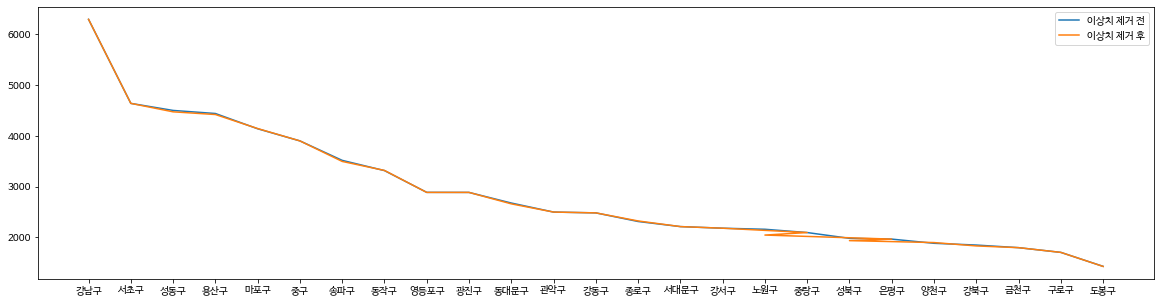

In [15]:
# 이상치 제거 전후 비교
fig = plt.figure(figsize=(20,5))
plt.plot(report1['대지평당(만원)'], label='이상치 제거 전')
plt.plot(report2['대지평당(만원)'], label='이상치 제거 후')
plt.legend()
plt.show()

### 관심 정보 분석 - 관심지역 가격 추이

In [16]:
tmp_df = pd.DataFrame.copy(work_df[work_df['지역구']=='강서구'])
tmp_df = tmp_df.sort_values('계약')
tmp_df.set_index('계약', inplace=True)
tmp_df

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,지역구,대지평당(만원),연면적평당(만원)
계약,,,,,,,,,,,,
2020-01-03,서울특별시 강서구 공항동,6**,단독,8m미만,131000,1987,방화대로7다길,54.4,69.5,강서구,2408.1,1884.9
2020-01-06,서울특별시 강서구 등촌동,5**,단독,8m미만,145000,1989,등촌로53길,60.9,83.3,강서구,2381.0,1740.7
2020-01-06,서울특별시 강서구 화곡동,9**,단독,8m미만,57000,1981,화곡로53가길,58.6,29.3,강서구,972.7,1945.4
2020-01-09,서울특별시 강서구 화곡동,8**,단독,25m미만,81500,1970,곰달래로,32.7,37.1,강서구,2492.4,2196.8
2020-01-10,서울특별시 강서구 화곡동,7**,단독,8m미만,66200,1985,강서로5라길,44.2,64.5,강서구,1497.7,1026.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,서울특별시 강서구 화곡동,8**,단독,8m미만,74500,1990,강서로10길,37.2,55.7,강서구,2002.7,1337.5
2020-11-24,서울특별시 강서구 화곡동,9**,단독,8m미만,114000,1978,화곡로53가길,66.8,49.9,강서구,1706.6,2284.6
2020-11-26,서울특별시 강서구 개화동,2**,단독,8m미만,119000,1980,개화10길,127.9,32.9,강서구,930.4,3617.0


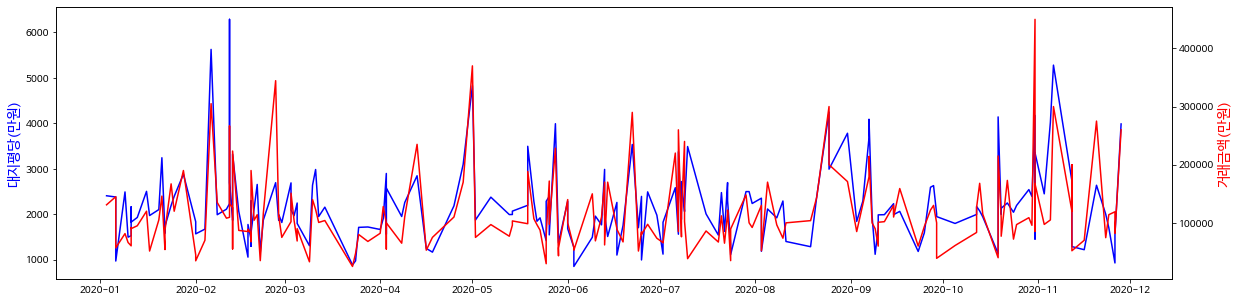

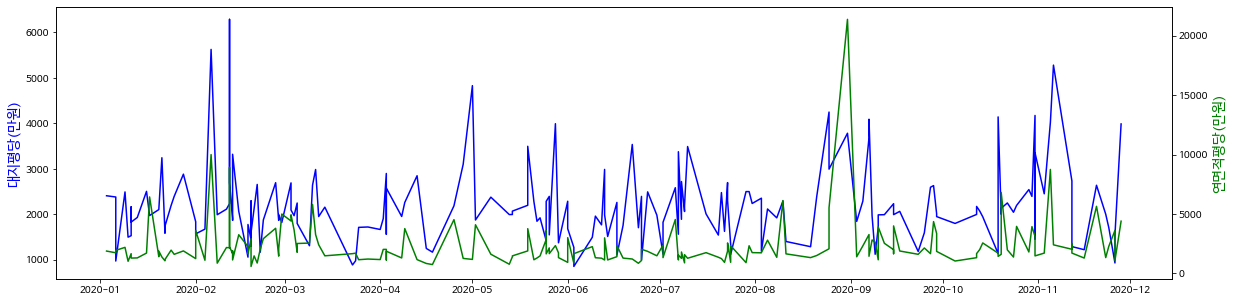

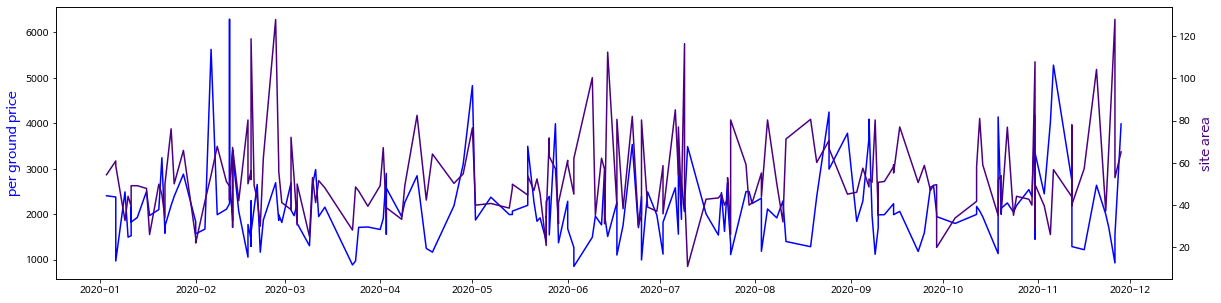

In [17]:
## Two Y axis python matplotlib

# 대지평당 vs 거래금액
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(tmp_df['대지평당(만원)'], color="blue")
ax.set_ylabel("대지평당(만원)", color="blue", fontsize=14)
ax2=ax.twinx()
ax2.plot(tmp_df['거래금액(만원)'], color="red")
ax2.set_ylabel("거래금액(만원)", color="red", fontsize=14)
plt.show()

# 대지평당 vs 연면적평당
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(tmp_df['대지평당(만원)'], color="blue")
ax.set_ylabel("대지평당(만원)", color="blue", fontsize=14)
ax2=ax.twinx()
ax2.plot(tmp_df['연면적평당(만원)'], color="green")
ax2.set_ylabel("연면적평당(만원)", color="green", fontsize=14)
plt.show()

# 대지평당 vs 대지면적
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(tmp_df['대지평당(만원)'], color="blue")
ax.set_ylabel("per ground price", color="blue", fontsize=14)
ax2=ax.twinx()
ax2.plot(tmp_df['대지면적'], color="indigo")
ax2.set_ylabel("site area", color="indigo", fontsize=14)
plt.show()

In [18]:
tmp_df = pd.DataFrame.copy(work_df[work_df['시군구']=='서울특별시 강서구 공항동'])
tmp_df = tmp_df.sort_values('계약')
tmp_df.set_index('계약', inplace=True)
tmp_df.sort_values('계약')

,시군구,번지,주택유형,도로조건,거래금액(만원),건축년도,도로명,대지면적,연면적,지역구,대지평당(만원),연면적평당(만원)
계약,,,,,,,,,,,,
2020-01-03,서울특별시 강서구 공항동,6**,단독,8m미만,131000,1987,방화대로7다길,54.4,69.5,강서구,2408.1,1884.9
2020-01-11,서울특별시 강서구 공항동,6**,단독,8m미만,90000,1987,방화대로5다길,49.2,69.5,강서구,1829.3,1295.0
2020-01-13,서울특별시 강서구 공항동,6**,단독,8m미만,95000,1988,방화대로5다길,49.2,72.6,강서구,1930.9,1308.5
2020-01-17,서울특별시 강서구 공항동,4*,단독,8m미만,51500,1983,공항대로3나길,26.1,8.0,강서구,1973.2,6437.5
2020-01-20,서울특별시 강서구 공항동,6**,단독,12m미만,105000,1987,남부순환로11길,49.9,55.7,강서구,2104.2,1885.1
2020-01-20,서울특별시 강서구 공항동,6**,단독,12m미만,105000,1990,남부순환로11길,49.9,74.4,강서구,2104.2,1411.3
2020-01-22,서울특별시 강서구 공항동,6**,단독,8m미만,87000,1987,방화대로7다길,50.0,74.2,강서구,1740.0,1172.5
2020-03-05,서울특별시 강서구 공항동,2*,단독,8m미만,90000,1978,공항대로7마길,50.0,35.7,강서구,1800.0,2521.0
2020-03-11,서울특별시 강서구 공항동,*,단독,8m미만,123000,1970,방화대로23길,41.2,37.6,강서구,2985.4,3271.3


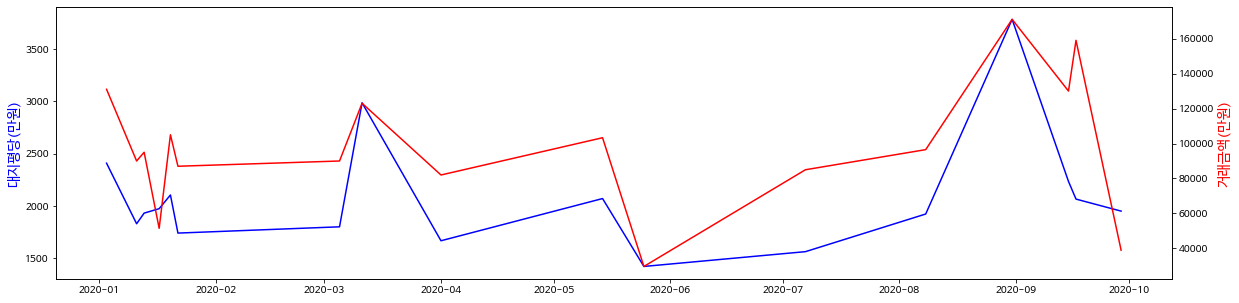

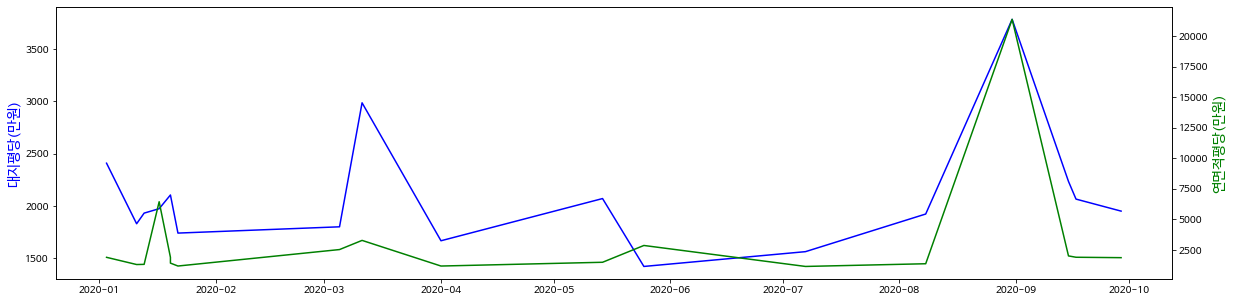

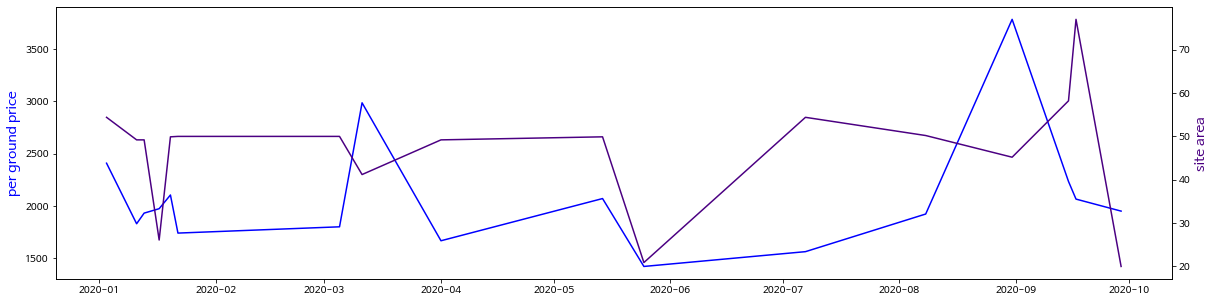

In [19]:
## Two Y axis python matplotlib

# 대지평당 vs 거래금액
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(tmp_df['대지평당(만원)'], color="blue")
ax.set_ylabel("대지평당(만원)", color="blue", fontsize=14)
ax2=ax.twinx()
ax2.plot(tmp_df['거래금액(만원)'], color="red")
ax2.set_ylabel("거래금액(만원)", color="red", fontsize=14)
plt.show()

# 대지평당 vs 연면적평당
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(tmp_df['대지평당(만원)'], color="blue")
ax.set_ylabel("대지평당(만원)", color="blue", fontsize=14)
ax2=ax.twinx()
ax2.plot(tmp_df['연면적평당(만원)'], color="green")
ax2.set_ylabel("연면적평당(만원)", color="green", fontsize=14)
plt.show()

# 대지평당 vs 대지면적
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(tmp_df['대지평당(만원)'], color="blue")
ax.set_ylabel("per ground price", color="blue", fontsize=14)
ax2=ax.twinx()
ax2.plot(tmp_df['대지면적'], color="indigo")
ax2.set_ylabel("site area", color="indigo", fontsize=14)
plt.show()

### 결과 그래프 만들기